# [Machine Learning, Unsupervised Learning, K-Means Clustering](https://scikit-learn.org/stable/modules/clustering.html#k-means)

## **Business Question Definition:**

### Can we segment our clients based on their purchasing behavior and demographic features to identify distinct groups that can be targeted with tailored marketing strategies?

This question seeks to group customers based on their purchasing habits along with demographic data (such as gender and membership type) to perform client segmentation. This information is valuable for creating personalized marketing campaigns.

### Loading and Exploring the E-commerce Customer Behaviour Dataset

In [1]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import silhouette_samples, silhouette_score
import numpy as np



import os

# Set the number of threads to 2 to avoid the memory leak warning!
os.environ["OMP_NUM_THREADS"] = "2"

# Load the dataset
file_path = '../raw/E-commerce Customer Behavior - Sheet1.csv'
data = pd.read_csv(file_path)
# Display the first few rows of the dataset
data.head()

,Customer ID,Gender,Age,City,Membership Type,Total Spend,Items Purchased,Average Rating,Discount Applied,Days Since Last Purchase,Satisfaction Level
0,101,Female,29,New York,Gold,1120.20,14,4.6,True,25,Satisfied
1,102,Male,34,Los Angeles,Silver,780.50,11,4.1,False,18,Neutral
2,103,Female,43,Chicago,Bronze,510.75,9,3.4,True,42,Unsatisfied
3,104,Male,30,San Francisco,Gold,1480.30,19,4.7,False,12,Satisfied
4,105,Male,27,Miami,Silver,720.40,13,4.0,True,55,Unsatisfied


In [2]:
print(data.dtypes)

Customer ID                   int64
Gender                       object
Age                           int64
City                         object
Membership Type              object
Total Spend                 float64
Items Purchased               int64
Average Rating              float64
Discount Applied               bool
Days Since Last Purchase      int64
Satisfaction Level           object
dtype: object


### Data Preprocessing

We need to preprocess the data before using K-Means clustering:
1. Deal with missing values by deciding how to handle them.
2. Choose relevant features for clustering such as purchase frequency and average purchase value.
3. Standardize the features because K-Means is sensitive to the scale of data.

In [3]:
# Check for missing values
missing_values = data.isnull().sum()

# Display missing values count for each column
missing_values


Customer ID                 0
Gender                      0
Age                         0
City                        0
Membership Type             0
Total Spend                 0
Items Purchased             0
Average Rating              0
Discount Applied            0
Days Since Last Purchase    0
Satisfaction Level          2
dtype: int64

In [4]:
# Handle missing values in 'Satisfaction Level' (categorical feature)
# Fill missing values with the mode (most frequent category)
data['Satisfaction Level'] = data['Satisfaction Level'].fillna(data['Satisfaction Level'].mode()[0])

# Verify that there are no more missing values in 'Satisfaction Level'
print("\nMissing Values after Imputation:\n", data.isnull().sum())



Missing Values after Imputation:
 Customer ID                 0
Gender                      0
Age                         0
City                        0
Membership Type             0
Total Spend                 0
Items Purchased             0
Average Rating              0
Discount Applied            0
Days Since Last Purchase    0
Satisfaction Level          0
dtype: int64


In [5]:
# Selecting relevant numerical features for clustering
features = ['Age', 'Total Spend', 'Items Purchased', 'Days Since Last Purchase']

# Extract the relevant features
X = data[features]

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [6]:
# Convert scaled data back to a DataFrame for better readability
X_scaled_df = pd.DataFrame(X_scaled, columns=features)
X_scaled_df.head()

,Age,Total Spend,Items Purchased,Days Since Last Purchase
0,-0.945152,0.760130,0.337346,-0.118359
1,0.082826,-0.179459,-0.385538,-0.639907
2,1.933185,-0.925570,-0.867461,1.148256
3,-0.739557,1.756144,1.542153,-1.086947
4,-1.356343,-0.345692,0.096385,2.116844


### Applying K-Means Clustering

We are applying K-Means clustering to the scaled features. First, we'll identify the optimal number of clusters using the Elbow method.

In [7]:
# Determine the optimal number of clusters using the Elbow method
inertia = []
k_range = range(1, 11)
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)


c:\Users\fredy\.conda\envs\deeplearning_env\lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
c:\Users\fredy\.conda\envs\deeplearning_env\lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
c:\Users\fredy\.conda\envs\deeplearning_env\lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
c:\Users\fredy\.conda\envs\deeplearning_env\lib\site-packages\sklearn\cluster\_

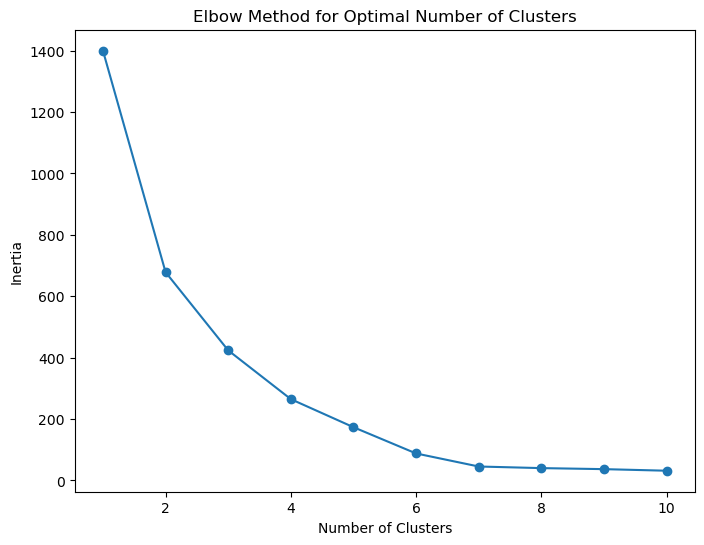

In [8]:

# Plot the Elbow curve
plt.figure(figsize=(8, 6))
plt.plot(k_range, inertia, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.show()


In [9]:

# Assuming the elbow is at 3 clusters based on the plot
optimal_clusters = 3
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
data['Cluster'] = kmeans.fit_predict(X_scaled)


# Analyze the characteristics of each cluster
cluster_analysis = data.groupby('Cluster')[features].mean()
cluster_analysis


c:\Users\fredy\.conda\envs\deeplearning_env\lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


,Age,Total Spend,Items Purchased,Days Since Last Purchase
Cluster,,,,
0,37.020408,594.146939,9.612245,27.040816
1,29.898305,1306.650847,17.559322,17.923729
2,27.083333,701.277778,12.611111,52.527778


### Interpreting the Elbow Chart
Based on this chart, we should use 3 clusters for our K-Means clustering. This number of clusters balances model complexity with clustering effectiveness. Adding more clusters beyond this point would only provide small benefits, making three the most appropriate choice.
Now, we can cluster our data into three groups and analyze the results to understand the characteristics of each segment. This will allow us to draw meaningful conclusions about our customer segments.

### Silhouette Score Calculation

In [10]:
# Calculate the silhouette score for each sample
silhouette_vals = silhouette_samples(data[['Total Spend', 'Items Purchased']], kmeans.labels_)

# Calculate the mean silhouette score
overall_silhouette_score = silhouette_score(data[['Total Spend', 'Items Purchased']], kmeans.labels_)

# Add the silhouette scores to your dataset
data['Silhouette Score'] = silhouette_vals

print(f'Overall Silhouette Score: {overall_silhouette_score:.3f}')


Overall Silhouette Score: 0.312


### Plot the Silhouette Score

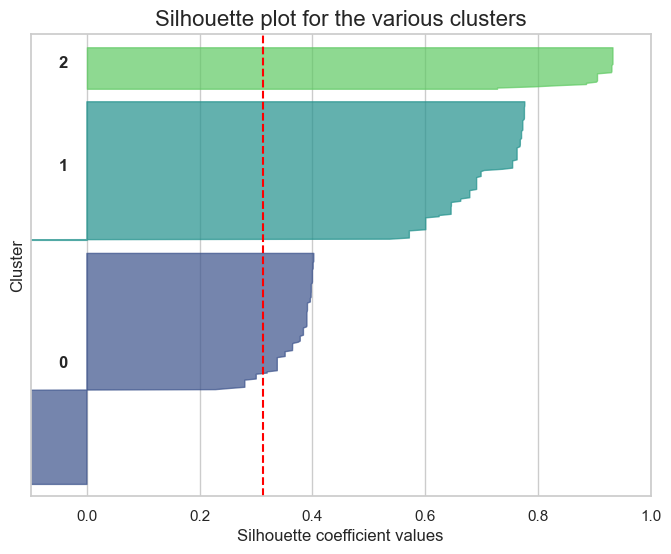

In [11]:
# Set the style for the plot
sns.set_theme(style="whitegrid")

# Number of clusters
num_clusters = len(np.unique(kmeans.labels_))

# Create a subplot
fig, ax = plt.subplots(figsize=(8, 6))

# Define colors for each cluster
colors = sns.color_palette("viridis", num_clusters)

# Plot the silhouette scores for each cluster
y_lower = 10
for i in range(num_clusters):
    ith_cluster_silhouette_values = silhouette_vals[kmeans.labels_ == i]
    ith_cluster_silhouette_values.sort()
    
    size_cluster_i = ith_cluster_silhouette_values.shape[0]
    y_upper = y_lower + size_cluster_i
    
    color = colors[i]
    ax.fill_betweenx(np.arange(y_lower, y_upper),
                     0, ith_cluster_silhouette_values,
                     facecolor=color, edgecolor=color, alpha=0.7)
    
    # Label the silhouette plots with cluster numbers
    ax.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i), fontsize=12, fontweight='bold')
    
    # Compute the new y_lower for next plot
    y_lower = y_upper + 10  # 10 for the 0 samples gap between clusters

ax.set_title("Silhouette plot for the various clusters", fontsize=16)
ax.set_xlabel("Silhouette coefficient values", fontsize=12)
ax.set_ylabel("Cluster", fontsize=12)

# The vertical line for average silhouette score of all the values
ax.axvline(x=overall_silhouette_score, color="red", linestyle="--")

ax.set_yticks([])  # Clear the y-axis labels/ticks
ax.set_xlim([-0.1, 1])  # The silhouette coefficient range from -1 to 1
ax.set_ylim([0, len(data) + (num_clusters + 1) * 10])

plt.show()


### Insights from Silhouette Score
- Silhouette Coefficient Range:
  - Values close to 1: Well-clustered data points.
  - Values around 0: Data points are on or very close to the decision boundary.
  - Negative values: Data points might be assigned to the wrong cluster.

- Cluster Separation:
  - Cluster 0: Wide range of silhouette scores, some close to 0 or slightly negative.
  - Cluster 1: Higher silhouette scores overall, most values above 0.4.
  - Cluster 2: High silhouette scores, similar to Cluster 1.

- Average Silhouette Score:
  - Overall average silhouette score is around 0.4, indicating reasonably good clustering.

### Comparing Silhouette with the Elbow Method:
Both the elbow and the silhouette plots indicate that three clusters are optimal.

- The elbow method shows a clear bend at 3 clusters.
- The silhouette plot indicates good separation and compactness for the 3 clusters with no significant overlap or negative scores. This means that the points are correctly clustered.

Combining the compact and well-separated clusters with the confirmation from the elbow method makes 3 clusters a strong choice.

### Running K-Means with the Optimal Number of Clusters

In [12]:
# Apply K-Means with the optimal number of clusters
optimal_clusters = 3
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
data['Cluster'] = kmeans.fit_predict(X_scaled)

# Display the first few rows with cluster assignments
data.head()

c:\Users\fredy\.conda\envs\deeplearning_env\lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


,Customer ID,Gender,Age,City,Membership Type,Total Spend,Items Purchased,Average Rating,Discount Applied,Days Since Last Purchase,Satisfaction Level,Cluster,Silhouette Score
0,101,Female,29,New York,Gold,1120.20,14,4.6,True,25,Satisfied,1,0.537189
1,102,Male,34,Los Angeles,Silver,780.50,11,4.1,False,18,Neutral,0,-0.608789
2,103,Female,43,Chicago,Bronze,510.75,9,3.4,True,42,Unsatisfied,0,0.319890
3,104,Male,30,San Francisco,Gold,1480.30,19,4.7,False,12,Satisfied,1,0.768761
4,105,Male,27,Miami,Silver,720.40,13,4.0,True,55,Unsatisfied,2,0.885531


### Analyzing the Clusters
We will analyze the characteristics of each cluster to understand the segments better.

In [13]:
# Calculate the mean of each feature for each cluster
cluster_analysis = data.groupby('Cluster')[features].mean()

# Display the cluster analysis
cluster_analysis


,Age,Total Spend,Items Purchased,Days Since Last Purchase
Cluster,,,,
0,37.020408,594.146939,9.612245,27.040816
1,29.898305,1306.650847,17.559322,17.923729
2,27.083333,701.277778,12.611111,52.527778


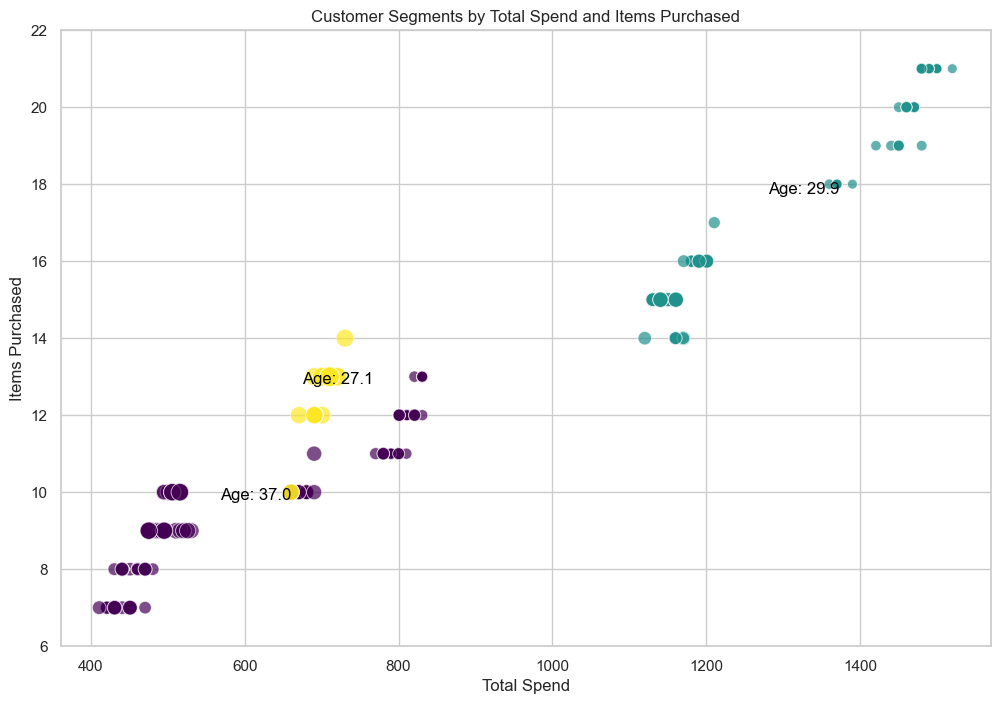

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

# Ensure that only numeric columns are selected for calculating cluster centers
numeric_columns = ['Age', 'Total Spend', 'Items Purchased', 'Days Since Last Purchase']

# Group by 'Cluster' and calculate the mean for numeric columns only
cluster_centers = data.groupby('Cluster')[numeric_columns].mean()

# Set the style for the plot
sns.set_theme(style="whitegrid")

# Plot the clusters based on Total Spend and Items Purchased
plt.figure(figsize=(12, 8))

# Scatter plot with 'Total Spend' on x-axis and 'Items Purchased' on y-axis
sns.scatterplot(
    x="Total Spend", 
    y="Items Purchased", 
    hue="Cluster", 
    size="Days Since Last Purchase", 
    sizes=(50, 200), 
    data=data, # 'data' should be your dataset with the cluster assignments
    palette="viridis", 
    legend=False,  # Disable legend for 'Days Since Last Purchase' to avoid clutter
    alpha=0.7  # Add transparency to help with overlapping points
)

# Adding titles and labels
plt.title("Customer Segments by Total Spend and Items Purchased")
plt.xlabel("Total Spend")
plt.ylabel("Items Purchased")

# Annotate the plot to show the average age of each cluster
for cluster, row in cluster_centers.iterrows():
    plt.text(
        x=row['Total Spend'] + 20, 
        y=row['Items Purchased'] + 0.2, 
        s=f"Age: {round(row['Age'], 1)}", 
        horizontalalignment='center', 
        fontdict=dict(color='black', size=12)
    )

# Adjust plot limits to avoid cut-off annotations
plt.xlim(data['Total Spend'].min() - 50, data['Total Spend'].max() + 50)
plt.ylim(data['Items Purchased'].min() - 1, data['Items Purchased'].max() + 1)

plt.show()


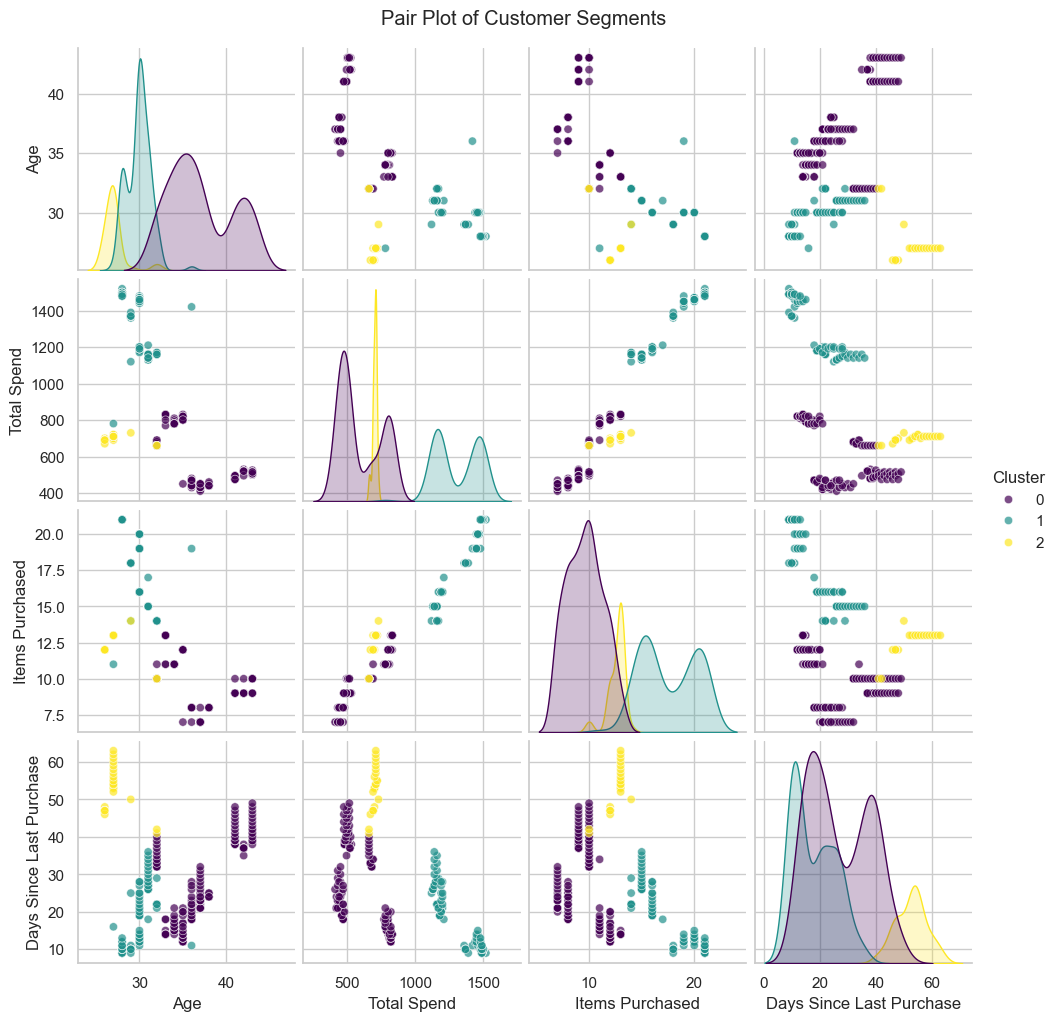

In [15]:
# Selecting a subset of the dataset with relevant features and the cluster labels
pairplot_data = data[['Age', 'Total Spend', 'Items Purchased', 'Days Since Last Purchase', 'Cluster']]

# Creating the pair plot
sns.pairplot(pairplot_data, hue='Cluster', palette="viridis", diag_kind='kde', plot_kws={'alpha':0.7})

# Adding a title to the pair plot
plt.suptitle("Pair Plot of Customer Segments", y=1.02)
plt.show()


### Conclusions and Actionable Insights from the Client Segmentation Analysis using K-Means Clustering

The clustering analysis has provided a clear segmentation of customers into three distinct groups, each with unique characteristics. By tailoring marketing strategies to these segments, the business can better address the needs of different customer groups, potentially increasing customer satisfaction and overall sales.

### **1. Cluster Characteristics:**
   - **Cluster 0 (Purple)**:
     - **Average Age:** 37.02 years
     - **Total Spend:** Approximately 594.15 units
     - **Items Purchased:** Around 9.61 items
     - **Days Since Last Purchase:** 27.04 days
     - **Insight:** Customers in this cluster are relatively older, spend less, and purchase fewer items. They also have a moderate recency in terms of purchases.
   
   - **Cluster 1 (Teal)**:
     - **Average Age:** 29.90 years
     - **Total Spend:** Approximately 1306.65 units
     - **Items Purchased:** Around 17.56 items
     - **Days Since Last Purchase:** 17.92 days
     - **Insight:** This cluster represents younger customers who are high spenders and buy more items. They are also more recent in their purchases compared to other clusters.

   - **Cluster 2 (Yellow)**:
     - **Average Age:** 27.08 years
     - **Total Spend:** Approximately 701.28 units
     - **Items Purchased:** Around 12.61 items
     - **Days Since Last Purchase:** 52.53 days
     - **Insight:** These customers are younger but spend less and purchase a moderate number of items. They have a higher recency, meaning they have not purchased in a while compared to other clusters.

### **2. Silhouette Score and Clustering Quality:**
   - **Silhouette Score:** The silhouette plot suggests that three clusters are a reasonable choice, as the score is relatively high for each cluster. A higher silhouette score indicates that the clusters are well-defined, and the data points are better grouped within their respective clusters.
   - **Insight:** The clusters are distinct and well-separated, which supports the hypothesis that three segments are appropriate for this dataset.

### **3. Pair Plot Observations:**
   - **Distribution Overlap:** The pair plot shows some overlap in distributions, particularly between Cluster 0 and Cluster 2. However, Cluster 1 stands out as a high-spending, high-item-purchasing segment, which is less overlapped with the others.
   - **Insight:** Cluster 1 could be considered a premium or high-value customer segment, which may warrant focused marketing or retention strategies.

### **Actionable Insights:**
   - **Targeted Marketing:** 
     - **Cluster 1:** Given their high spending and recent activity, consider targeted promotions, loyalty programs, or premium offerings to maintain their engagement and spending levels.
     - **Cluster 0:** These customers might benefit from offers or incentives to increase their spending and purchase frequency, given their moderate recency and lower spend.
     - **Cluster 2:** Re-engagement strategies might be effective here, such as reminders or special deals to bring these customers back into more regular purchasing habits.

   - **Product Bundling:** Consider offering product bundles or cross-selling strategies, especially for Cluster 1, to further increase their spend per transaction.

   - **Customer Retention:** Focus on personalized retention strategies for Cluster 2 to reduce the days since the last purchase and encourage more frequent shopping behavior.